### in this notebook we will try to create a custom dataset the returns the fer2013 images with the fer2013new labels 

### Resources
* [kaggle link to fer2013 data](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)
* [FERPlus](https://github.com/microsoft/FERPlus) - github repo containing the augmented labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
fer2013 = pd.read_csv('../../data/fer2013/fer2013.csv')

In [4]:
fer2013.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


fer2013 label values taken from [kaggle link](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)

In [5]:
fer2013labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [6]:
fer2013new = pd.read_csv('../../data/FERplus/fer2013new.csv')

In [7]:
fer2013new.head()

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0


### let's explore the data a bit

there are some images with a label of unknown. let's visualize a few of these

In [8]:
unknown = fer2013new[fer2013new['unknown'] != 0]

In [9]:
unknown.head()

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
5,Training,fer0000005.png,6,0,0,1,0,0,1,1,1,0
12,Training,fer0000012.png,5,0,0,3,0,0,0,0,2,0


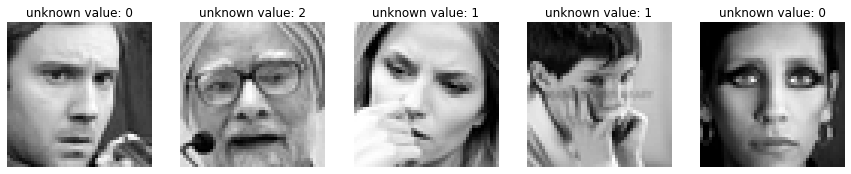

In [10]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    image = fer2013['pixels'].iloc[i]
    image = np.fromstring(image, sep=' ').reshape(48, 48)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'unknown value: {fer2013new.unknown.iloc[i]}')

In [11]:
fer2013new['unknown'] != 0

0        False
1         True
2         True
3         True
4        False
         ...  
35882    False
35883    False
35884    False
35885    False
35886     True
Name: unknown, Length: 35887, dtype: bool

### now we'll try to plot an image using the values from the pixels column

In [12]:
index = 0

In [13]:
image = fer2013['pixels'].iloc[index]

In [14]:
image = np.fromstring(image, sep=' ').reshape(48, 48)

In [15]:
image

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

(-0.5, 47.5, 47.5, -0.5)

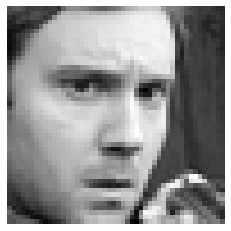

In [16]:
plt.imshow(image, cmap='gray')
plt.axis('off')

In [17]:
label_fer2013 = fer2013labels[fer2013['emotion'].iloc[index]]
print(f'fer2013 label: {label_fer2013}')

fer2013 label: angry


In [18]:
fer2013new.iloc[index][2:11]

neutral      4
happiness    0
surprise     0
sadness      1
anger        3
disgust      2
fear         0
contempt     0
unknown      0
Name: 0, dtype: object

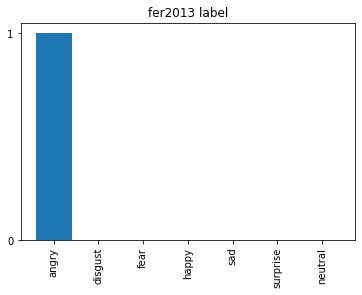

In [19]:
fer2013labelvals = np.zeros_like(fer2013labels, dtype='int')
fer2013labelvals[index] = 1
plt.bar(fer2013labels, fer2013labelvals)
plt.yticks([0.0, 1.0])
plt.xticks(rotation=90)
plt.title('fer2013 label')
plt.show()

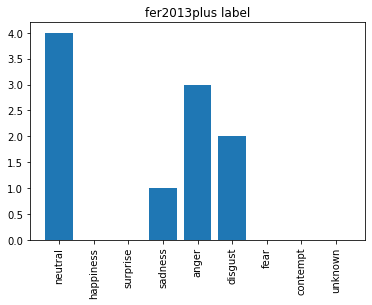

In [21]:
plt.bar(fer2013new.iloc[index][2:11].index, fer2013new.iloc[index][2:11].values)
plt.xticks(rotation=90)
plt.title('fer2013plus label')
plt.show()

### let's create a function that will plot 5 images along with their fer2013 labels and their fer2013new labels

In [22]:
def display_images(num_of_images = 5):
    indexes = np.random.choice(np.arange(fer2013.shape[0]), num_of_images)
    for i,ind in enumerate(indexes):
        image = fer2013['pixels'].iloc[ind]
        image = np.fromstring(image, sep=' ').reshape(48, 48)
        fig = plt.figure(figsize=(15,5))
        fig.add_subplot(1,3,1)
        plt.imshow(image, cmap='gray')

        fig.add_subplot(1,3,2)
        fer2013labelvals = np.zeros_like(fer2013labels, dtype='int')
        fer2013labelvals[fer2013['emotion'].iloc[ind]] = 1
        plt.bar(fer2013labels, fer2013labelvals)
        plt.yticks([0.0, 1.0])
        plt.xticks(rotation=90)
        plt.title('fer2013 label')

        fig.add_subplot(1,3,3)
        plt.bar(fer2013new.iloc[ind][2:11].index, fer2013new.iloc[ind][2:11].values)
        plt.xticks(rotation=90)
        plt.title('fer2013plus label')

        plt.show()

#### example 1

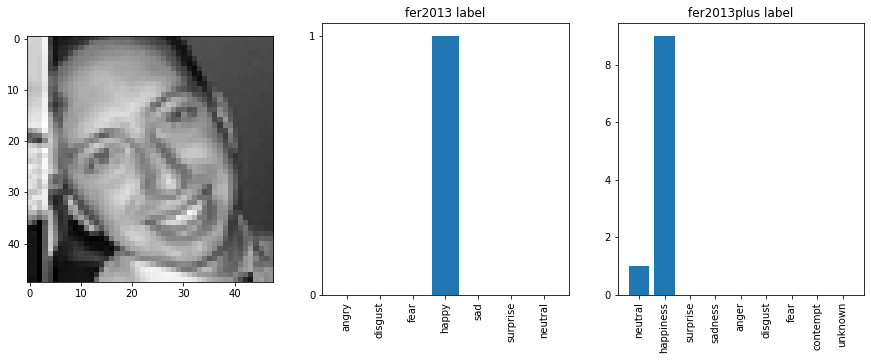

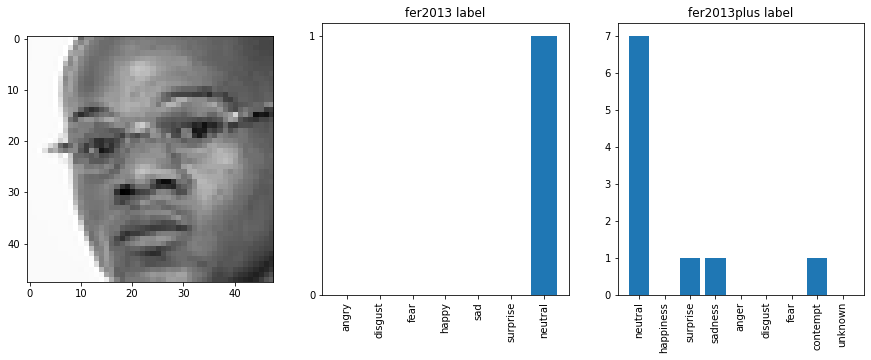

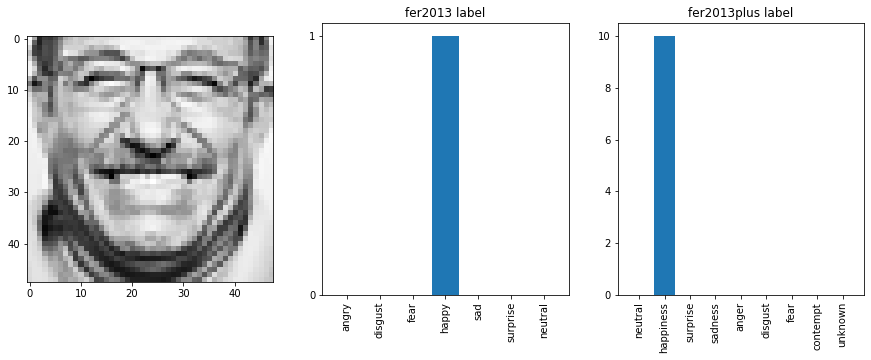

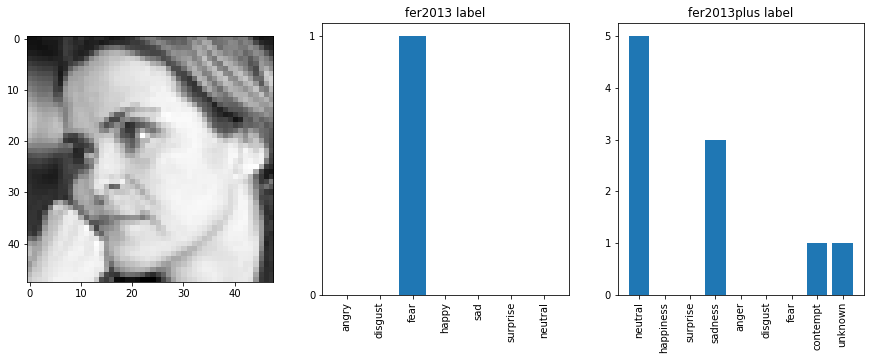

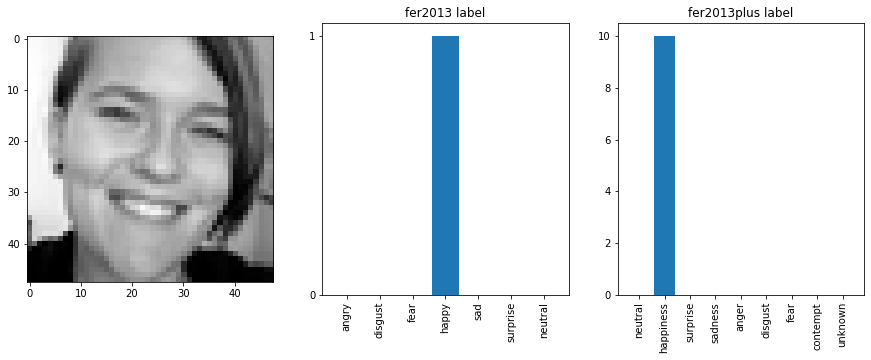

In [25]:
display_images()

#### example 2

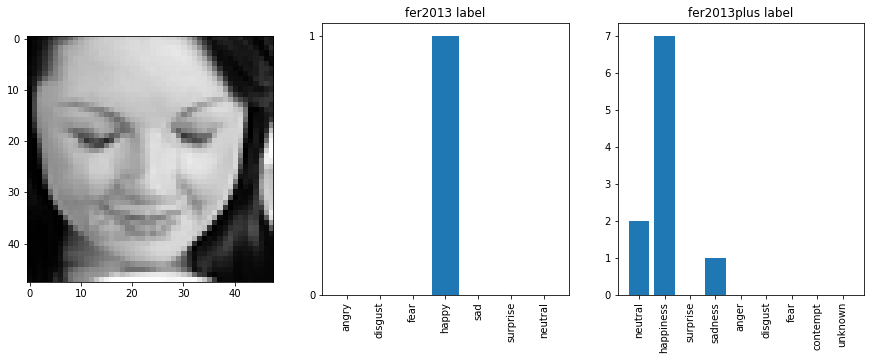

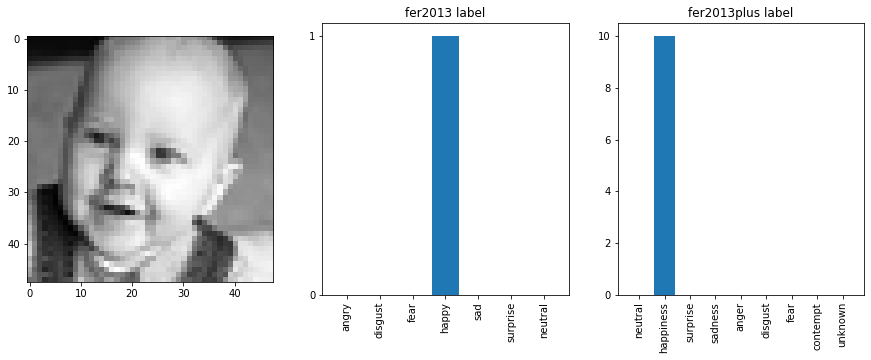

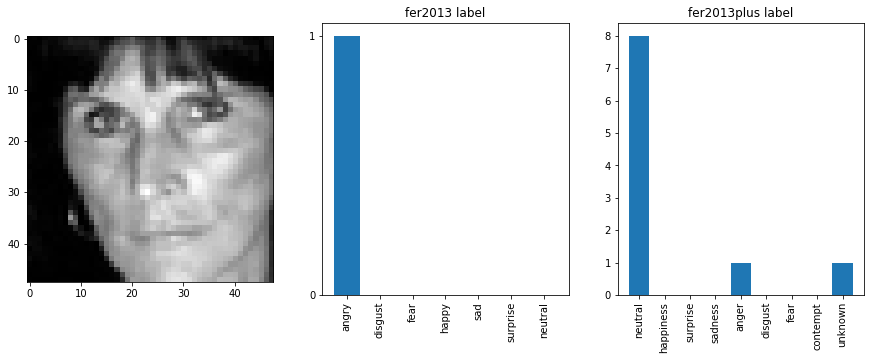

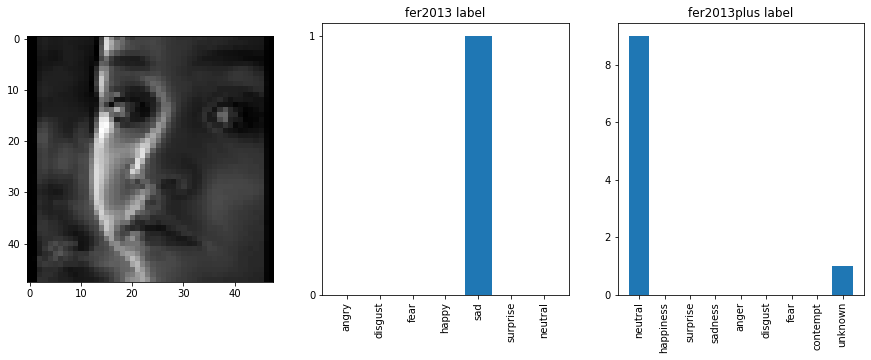

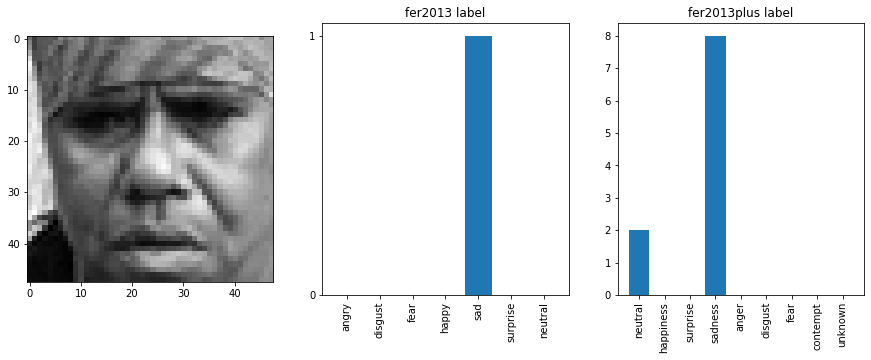

In [24]:
display_images()

### inference

As we can see, the labels from fer2013new are much more accurate, because it returns a distribution of emotions, rather than a single emotion. So we'll use the fer2013new labels 

### we'll now create a custom dataset in pytorch that will return an image and its fer2013new label

In [25]:
fer2013new.columns[2:11]

Index(['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust',
       'fear', 'contempt', 'unknown'],
      dtype='object')

In [43]:
class FERdataset(Dataset):
    def __init__(self, path_fer2013csv, path_fer2013newcsv):
        self.fer2013 = pd.read_csv(path_fer2013csv)
        self.fer2013labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        self.fer2013new = pd.read_csv(path_fer2013newcsv)
        self.fer2013newlabels = list(self.fer2013new.columns[2:11])
        
    def __getitem__(self, index):
        '''
        returns an image and its fer2013new label as tensors
        '''
        image = self.fer2013['pixels'].iloc[index]
        image = np.fromstring(image, sep=' ').reshape(48, 48)
        image = torch.tensor(image, dtype=torch.float32) / 255.
        
        label = torch.tensor(self.fer2013new.iloc[index][2:11].values.astype('float32')) / 10.
        
        return image, label
        
    def __len__(self):
        return self.fer2013.shape[0]

#### create an instance of the custom dataset class

In [44]:
path_fer2013csv='../../data/fer2013/fer2013.csv'
path_fer2013newcsv='../../data/FERplus/fer2013new.csv'
dataset = FERdataset(path_fer2013csv, path_fer2013newcsv)

#### let's test some functions

In [45]:
len(dataset)

35887

In [46]:
dataset.fer2013newlabels

['neutral',
 'happiness',
 'surprise',
 'sadness',
 'anger',
 'disgust',
 'fear',
 'contempt',
 'unknown']

In [47]:
dataloader = DataLoader(dataset, 1, shuffle=True)

In [48]:
sampleimage, samplelabel = next(iter(dataloader))

In [49]:
sampleimage

tensor([[[0.6078, 0.4314, 0.2431,  ..., 0.1216, 0.1608, 0.3216],
         [0.6078, 0.4235, 0.2392,  ..., 0.0667, 0.0980, 0.3255],
         [0.5961, 0.4000, 0.2314,  ..., 0.0353, 0.0627, 0.1686],
         ...,
         [0.5294, 0.5451, 0.5569,  ..., 0.0706, 0.0392, 0.0118],
         [0.5294, 0.5451, 0.5529,  ..., 0.0745, 0.0431, 0.0196],
         [0.5255, 0.5412, 0.5490,  ..., 0.0627, 0.0549, 0.0275]]])

In [50]:
samplelabel

tensor([[0.8000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [51]:
sampleimage.dtype

torch.float32

In [52]:
samplelabel.dtype

torch.float32

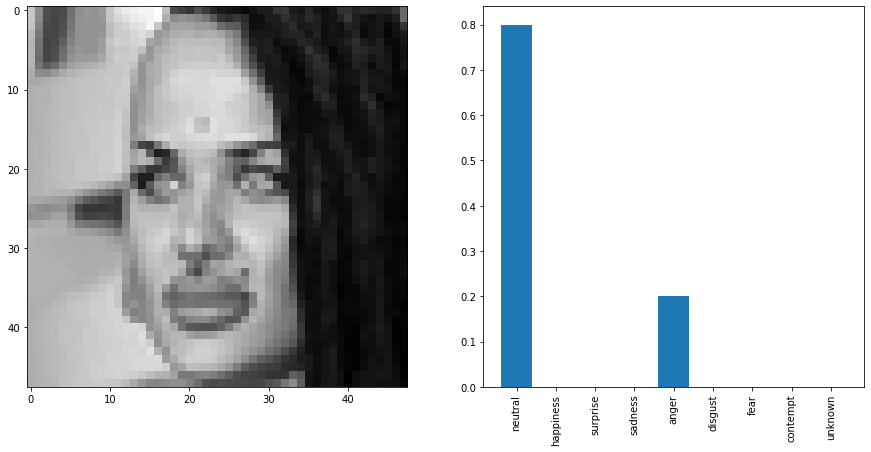

In [53]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(sampleimage[0], cmap='gray')
plt.subplot(122)
plt.bar(dataset.fer2013newlabels, samplelabel[0])
plt.xticks(rotation=90)
plt.show()

### let's create a function that plots a batch of images and their labels using a dataloader and the custom dataset

In [54]:
def display_images_dataloader(num_of_images=5):
    dataloader = DataLoader(dataset, num_of_images, shuffle=True)
    sample_images, sample_labels = next(iter(dataloader))
    print(f'image tensor shape: {sample_images.shape}, label tensor shape: {sample_labels.shape}')
    for i in range(num_of_images):
        image = sample_images[i]
        label = sample_labels[i]
        fig = plt.figure(figsize=(10,5))
        fig.add_subplot(121)
        plt.imshow(image, cmap='gray')
        fig.add_subplot(122)
        plt.bar(dataset.fer2013newlabels, label)
        plt.xticks(rotation=90)
        plt.show()

image tensor shape: torch.Size([5, 48, 48]), label tensor shape: torch.Size([5, 9])


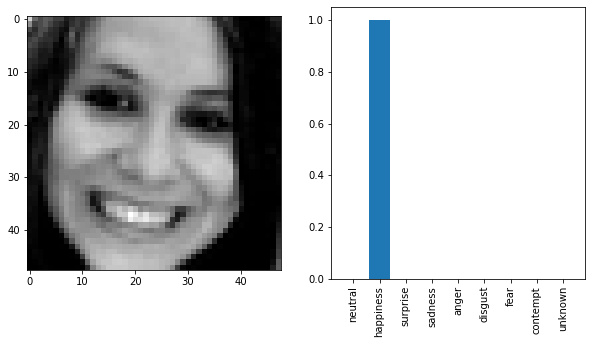

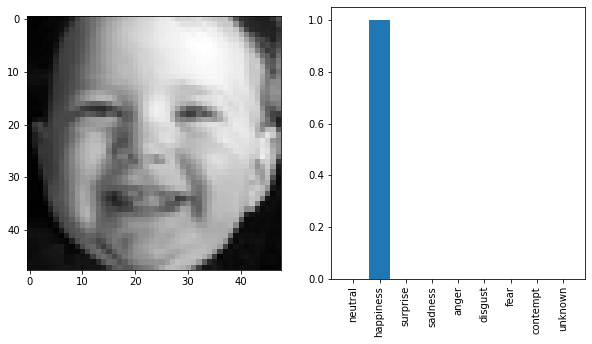

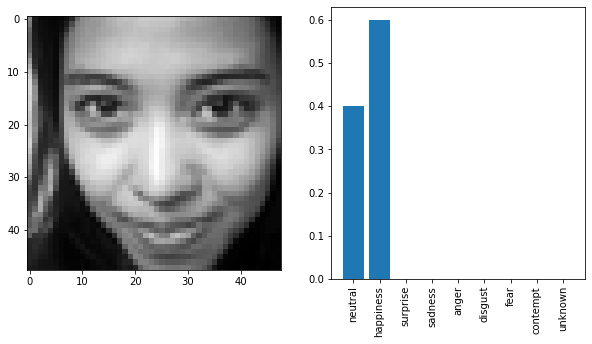

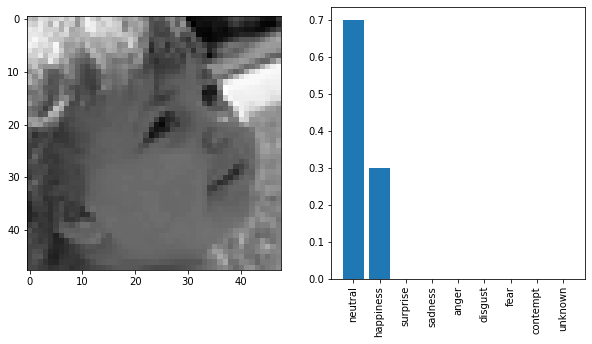

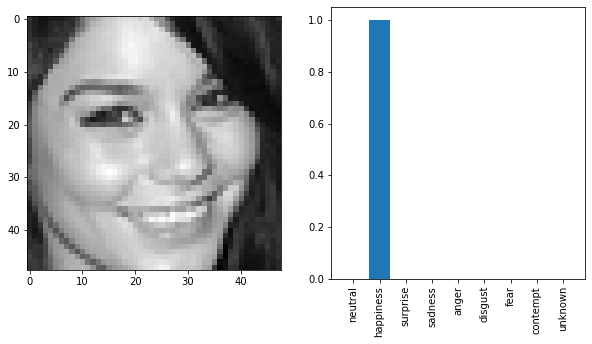

In [55]:
display_images_dataloader(5)

### Conclusion

A custom dataset was created, that returns a random image and its fer2013new label as tensors